# **Hotel bookings and cancelations analysis**

## This notebook will go through the folowing steps : 

### 1) We will perform EDA

### 2) Data prepocressing

### 3) Build 4 models and check accuracy

    a) Logistic Regression
    b) Gaussian Naive Bayes
    c) Decision Tree
    d) Random Forest
    e) KNN


### 4) Build ROC and AUC graphs

# **About the dataset :**

It contains details about what type of style of hotel is boooked , whether the reservations are cancelled , if yes at what point are they cancelled. They also contain details about through what medium is the reservation is made.

It also contains a lot of metrics that can have a direct effect on customer satisfaction.

We can also predict if a regular customer has any special request and have it ready before hand.



# **Business problem :**

1.	Customers more likely to cancel so that it could be given to another customer with a certain level of confidence. Try and understand their behavior to work towards getting them what they want without having to lose much. 

2.	Hotels often allocate rooms for cabin crew, trying to understand their delay patterns could help better organize their stay.

3.	It would help better understand the customer thought process while booking flights, understand how travel agents make their cut – hence to be more competitive to get direct bookings and improve infrastructure, design, and make custom itinerary and offers.





#**About the columns**

We have 32 columns

1) hotel = Type of hotel

           a) Resort Hotel
           b) City Hotel

2) is_canceled = Categorical data with 1 for canceled and 0 for not canceled

3) lead_time = Number of days between date of booking and day of arrival

4) arrival_date_year = Arrival year date

5) arrival_date_month = Arrival date month

6) arrival_date_week_number = Week number of year for arrival date

7) arrival_date_day_of_month = Day of arrival date

8) stays_in_weekend_nights = Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

9) stays_in_week_nights
Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

10) adults
Number of adults

11) children
Number of children

12)babies
Number of babies

13)meal
Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)

14)country
Country of origin. Categories are represented in the ISO 3155–3:2013 format

15)market_segment
Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

16)distribution_channel
Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

17)is_repeated_guest
Value indicating if the booking name was from a repeated guest (1) or not (0)

18)previous_cancellations
Number of previous bookings that were cancelled by the customer prior to the current booking

19)previous_bookings_not_canceled
Number of previous bookings not cancelled by the customer prior to the current booking

20)reserved_room_type
Code of room type reserved. Code is presented instead of designation for anonymity reasons.

21)assigned_room_type
Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

22)booking_changes
Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

23)deposit_type
Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.

24)agent
ID of the travel agency that made the booking

25)company
ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

26)days_in_waiting_list
Number of days the booking was in the waiting list before it was confirmed to the customer

27)customer_type
Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking

28)adr
Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

29)required_car_parking_spaces
Number of car parking spaces required by the customer

30)total_of_special_requests
Number of special requests made by the customer (e.g. twin bed or high floor)

31)reservation_status
Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why

32)reservation_status_date
Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel


In [1]:

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler 

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


from warnings import filterwarnings
filterwarnings('ignore')

In [2]:

from sklearn.metrics import classification_report

In [3]:
df=pd.read_csv('hotel_bookings.csv')

In [4]:
df.shape

(119390, 32)

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
categorical = [var for var in df.columns if df[var].dtype=='O']

In [9]:
categorical

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [10]:
len(categorical)

12

In [11]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [12]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [13]:
df.shape

(119390, 32)

4 columns have missing values.
Children column can be deleted as it is just 4 values out of 119390 rows. The rest will be replaced after removing outliers.

In [14]:
df['children'].isnull().sum()

4

In [15]:
i=df[df['children'].isnull()].index.tolist()


In [16]:
df.drop(index=i,inplace=True)

In [17]:
df.head(15)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,2015-04-22


<AxesSubplot:xlabel='is_canceled', ylabel='count'>

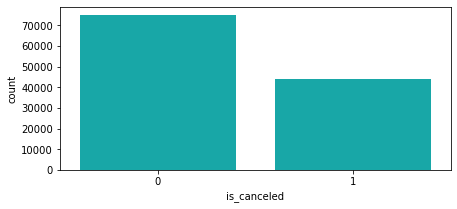

In [18]:
import seaborn as sns
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(x="is_canceled", data=df, color="c")

In [19]:
df["is_canceled"].value_counts()

0    75166
1    44220
Name: is_canceled, dtype: int64

In [20]:
print("Percentage of no cancelations:",(75166/df.shape[0])*100 , "%")
print("Percentage of cancelations:",(44220/df.shape[0])*100 , "%")

Percentage of no cancelations: 62.96048112844051 %
Percentage of cancelations: 37.03951887155948 %


In [21]:
print (df.groupby('hotel').is_canceled.count())

hotel
City Hotel      79326
Resort Hotel    40060
Name: is_canceled, dtype: int64


In [22]:
print (df.groupby('is_canceled').hotel.count())

is_canceled
0    75166
1    44220
Name: hotel, dtype: int64


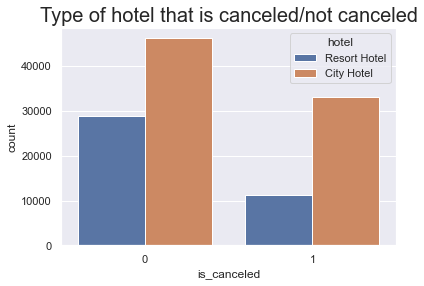

In [23]:
sns.set(style = "darkgrid")
plt.title("Type of hotel that is canceled/not canceled", fontdict = {'fontsize': 20})
ax = sns.countplot(x = "is_canceled", hue = 'hotel', data = df)

INSIGHT 

City hotels are mostly getting canceled

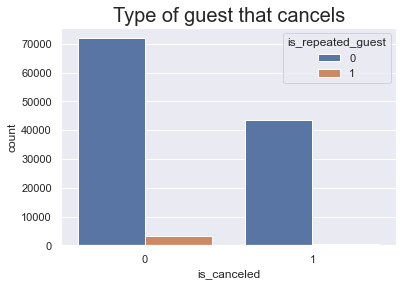

In [24]:
sns.set(style = "darkgrid")
plt.title("Type of guest that cancels", fontdict = {'fontsize': 20})
ax = sns.countplot(x = "is_canceled", hue = 'is_repeated_guest', data = df)

Orange represents repeated guests. In the x axis , 0 represents that a guest doesnt cancel. Only new customers tend to cancel.

In [25]:
print (df.groupby('arrival_date_year').is_canceled.count())

arrival_date_year
2015    21992
2016    56707
2017    40687
Name: is_canceled, dtype: int64


In [26]:
print (df.groupby('arrival_date_year').is_canceled.sum())

arrival_date_year
2015     8138
2016    20337
2017    15745
Name: is_canceled, dtype: int64


In [27]:
8138+20337+15745


44220

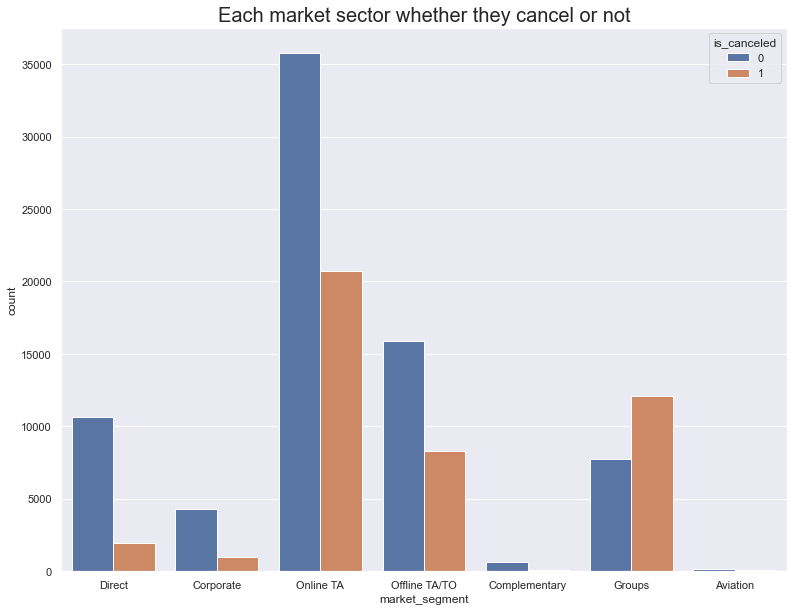

In [28]:
plt.figure(figsize = (13,10))
sns.set(style = "darkgrid")
plt.title("Each market sector whether they cancel or not", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'is_canceled', data = df)

In [29]:
df.groupby("market_segment").is_canceled.sum()

market_segment
Aviation            52
Complementary       97
Corporate          992
Direct            1933
Groups           12097
Offline TA/TO     8311
Online TA        20738
Name: is_canceled, dtype: int64

In [30]:
df["market_segment"].value_counts()

Online TA        56476
Offline TA/TO    24219
Groups           19811
Direct           12605
Corporate         5295
Complementary      743
Aviation           237
Name: market_segment, dtype: int64

In [31]:
print("% of cancelation in Aviation sector",round((52/237)*100),"%")
print("% of cancelation in Complementary sector",round((97/743)*100),"%")
print("% of cancelation in Corporate sector",round((992/5295)*100),"%")
print("% of cancelation in Direct sector",round((1933/12605)*100),"%")
print("% of cancelation in Groups sector",round((12097/19811)*100),"%")
print("% of cancelation in Offline TA/TO  sector",round((8311/24219)*100),"%")
print("% of cancelation in Online TA  sector",round((20738/56476)*100),"%")

% of cancelation in Aviation sector 22 %
% of cancelation in Complementary sector 13 %
% of cancelation in Corporate sector 19 %
% of cancelation in Direct sector 15 %
% of cancelation in Groups sector 61 %
% of cancelation in Offline TA/TO  sector 34 %
% of cancelation in Online TA  sector 37 %


Ofcourse complimentary tickets are the least cancelled cause why would someone want to give up free hotel stays ? 

	arrival_date_week_number	arrival_date_day_of_month	stays_in_weekend_nights	stays_in_week_nights

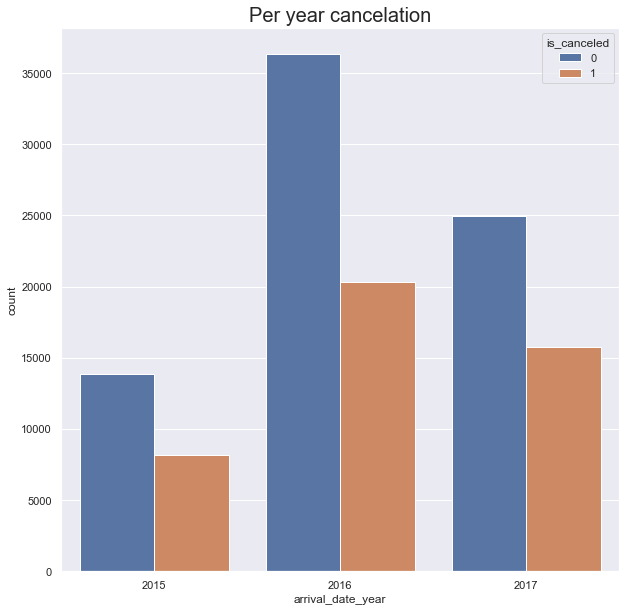

In [32]:
plt.figure(figsize = (10,10))
sns.set(style = "darkgrid")
plt.title("Per year cancelation", fontdict = {'fontsize':20})
ax = sns.countplot(x = "arrival_date_year", hue = 'is_canceled', data = df)

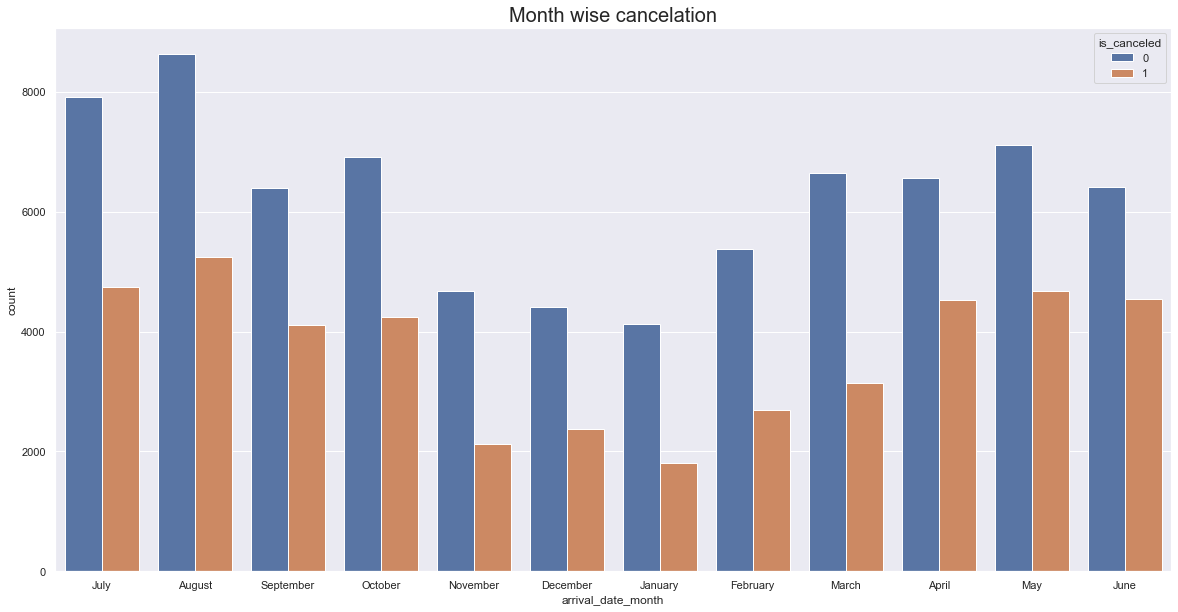

In [33]:
plt.figure(figsize = (20,10))
sns.set(style = "darkgrid")
plt.title("Month wise cancelation", fontdict = {'fontsize':20})
ax = sns.countplot(x = "arrival_date_month", hue = 'is_canceled', data = df)

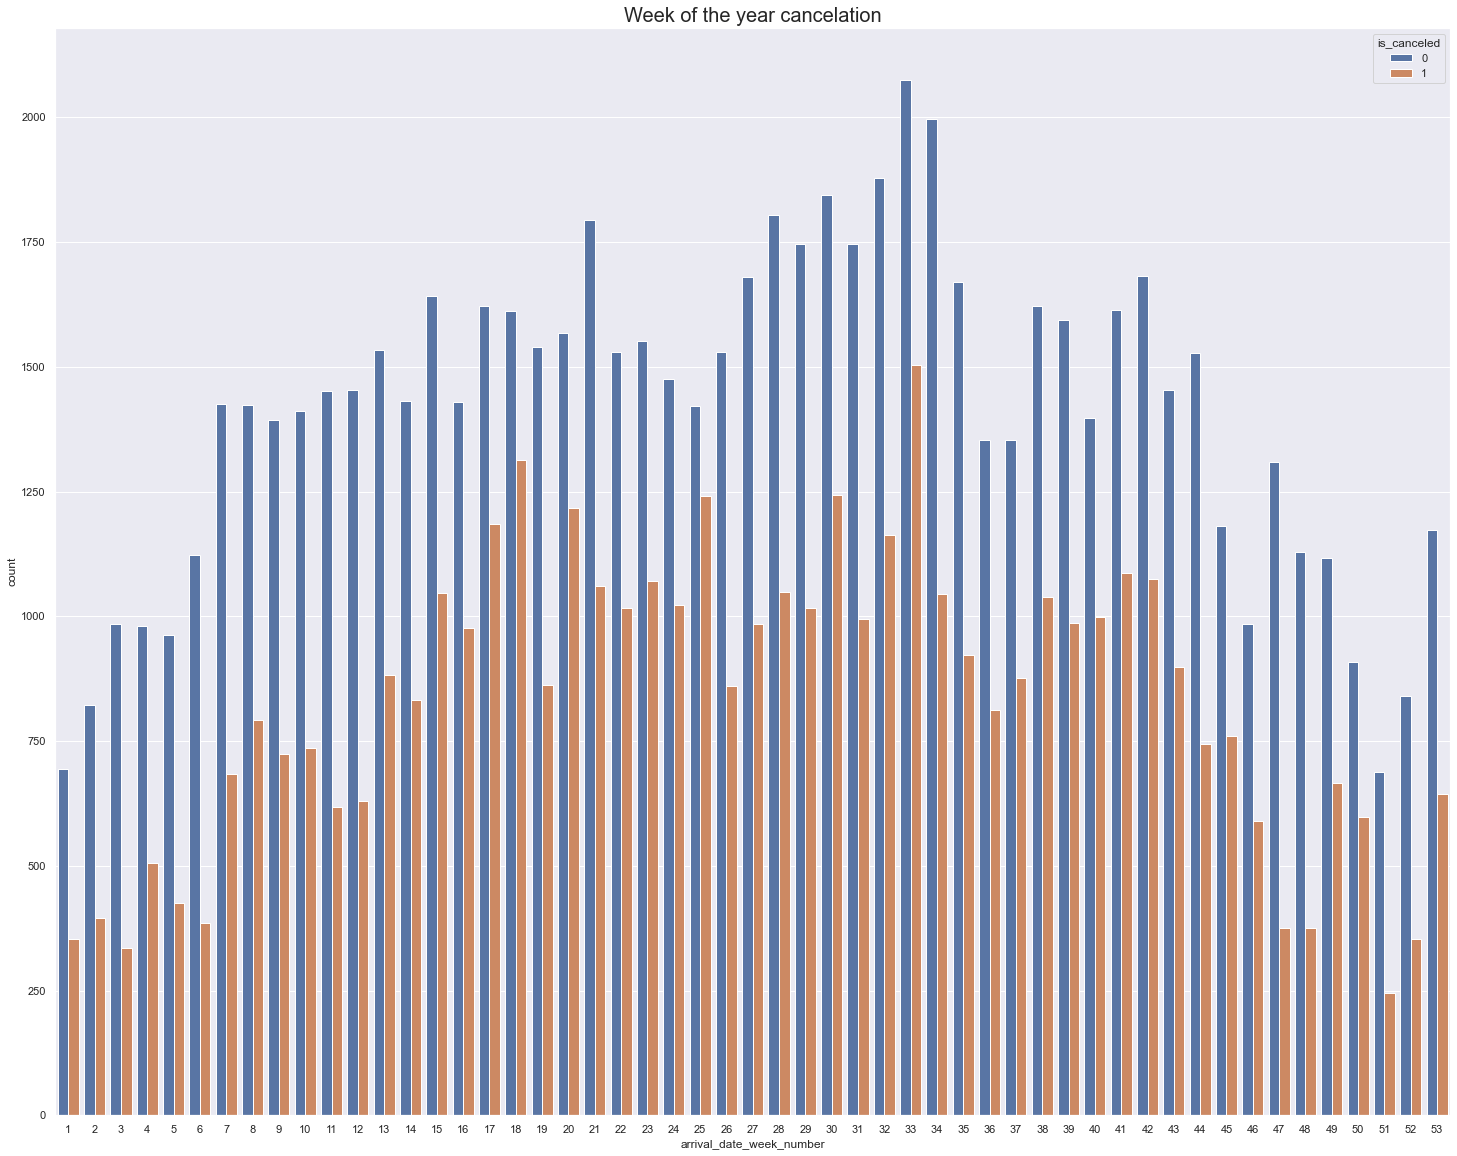

In [34]:
plt.figure(figsize = (25,20))
sns.set(style = "darkgrid")
plt.title("Week of the year cancelation", fontdict = {'fontsize':20})
ax = sns.countplot(x = "arrival_date_week_number", hue = 'is_canceled', data = df)

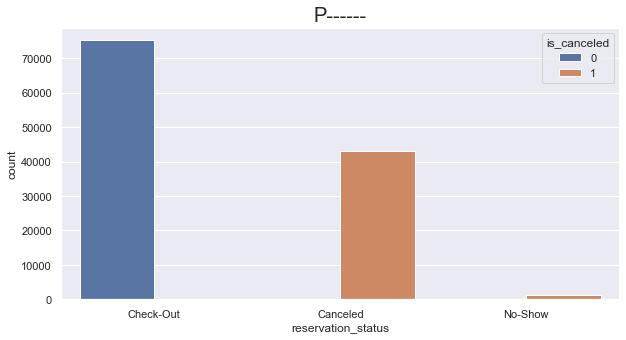

In [35]:
plt.figure(figsize = (10,5))
sns.set(style = "darkgrid")
plt.title("P------", fontdict = {'fontsize':20})
ax = sns.countplot(x = "reservation_status", hue = 'is_canceled', data = df)

In [36]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16338
company         

In [37]:
df["country"].mode()

0    PRT
dtype: object

Portugal is the most popular country of origin.

In [38]:
df["country"].unique()


array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

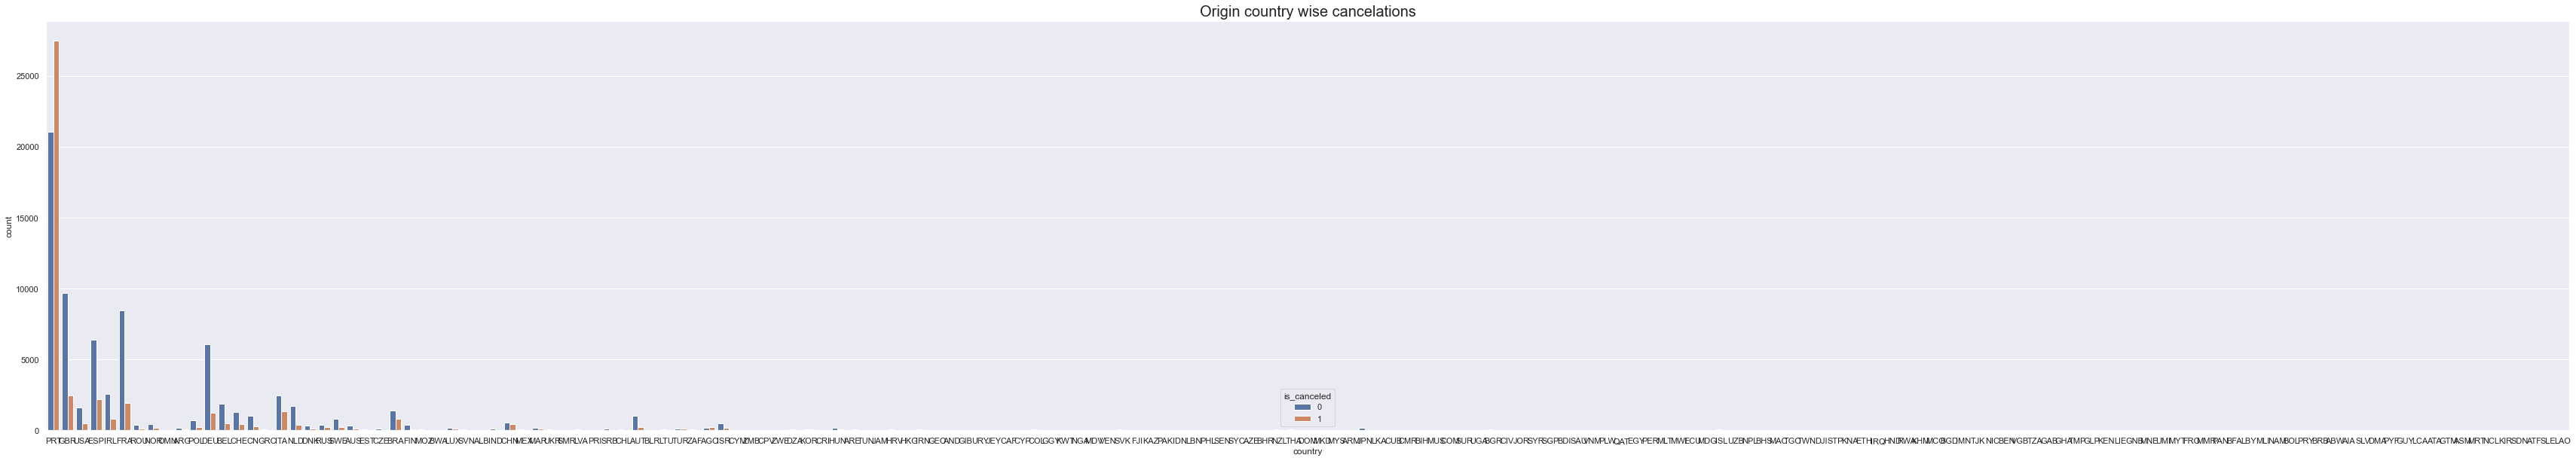

In [39]:
plt.figure(figsize = (60,10))
sns.set(style = "darkgrid")
plt.title("Origin country wise cancelations", fontdict = {'fontsize':20})
ax = sns.countplot(x = "country", hue = 'is_canceled', data = df)

In [40]:
data=df.copy()

In [41]:
def perc_mv(x, y):
    perc = y.isnull().sum() / len(x) * 100
    return perc

print('Missing value ratios:\nCompany: {}\nAgent: {}\nCountry: {}'.format(perc_mv(df, df['company']),
                                                                                   perc_mv(df, df['agent']),
                                                                                   perc_mv(df, df['country'])))

Missing value ratios:
Company: 94.3067026284489
Agent: 13.685021694336019
Country: 0.40875814584624665


In [42]:
data["agent"].value_counts().count()

333

In [43]:
# company is dropped
data = data.drop(['company'], axis = 1)

In [44]:
# We have also 4 missing values in children column. If there is no information about children, In my opinion those customers do not have any children.
data['children'] = data['children'].fillna(0)

In [45]:
data['hotel'] = data['hotel'].map({'Resort Hotel':0, 'City Hotel':1})

In [46]:
data['arrival_date_month'] = data['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                            'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [47]:
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,0,342,2015,7,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,0,737,2015,7,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,0,7,2015,7,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,0,13,2015,7,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,0,14,2015,7,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,0,0,14,2015,7,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,0,0,0,2015,7,27,1,0,2,2,...,0,No Deposit,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,0,0,9,2015,7,27,1,0,2,2,...,0,No Deposit,303.0,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,0,1,85,2015,7,27,1,0,3,2,...,0,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,2015-05-06
9,0,1,75,2015,7,27,1,0,3,2,...,0,No Deposit,15.0,0,Transient,105.5,0,0,Canceled,2015-04-22


In [48]:
def family(data):
    if ((data['adults'] > 0) & (data['children'] > 0)):
        val = 1
    elif ((data['adults'] > 0) & (data['babies'] > 0)):
        val = 1
    else:
        val = 0
    return val

In [49]:
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,0,342,2015,7,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,0,737,2015,7,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,0,7,2015,7,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,0,13,2015,7,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,0,14,2015,7,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,0,0,14,2015,7,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,0,0,0,2015,7,27,1,0,2,2,...,0,No Deposit,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,0,0,9,2015,7,27,1,0,2,2,...,0,No Deposit,303.0,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,0,1,85,2015,7,27,1,0,3,2,...,0,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,2015-05-06
9,0,1,75,2015,7,27,1,0,3,2,...,0,No Deposit,15.0,0,Transient,105.5,0,0,Canceled,2015-04-22


In [50]:
def deposit(data):
    if ((data['deposit_type'] == 'No Deposit') | (data['deposit_type'] == 'Refundable')):
        return 0
    else:
        return 1

In [51]:
def feature(data):
    data["is_family"] = data.apply(family, axis = 1)
    data["total_customer"] = data["adults"] + data["children"] + data["babies"]
    data["deposit_given"] = data.apply(deposit, axis=1)
    data["total_nights"] = data["stays_in_weekend_nights"]+ data["stays_in_week_nights"]
    return data

data = feature(data)

In [52]:
data.corr()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,deposit_given,total_nights
hotel,1.000000,0.136505,0.075405,0.035308,0.001805,0.001261,-0.001836,-0.186595,-0.234022,-0.013199,...,-0.072813,-0.790230,0.072436,0.096758,-0.218869,-0.043411,-0.058299,-0.040831,0.172014,-0.247481
is_canceled,0.136505,1.000000,0.293177,0.016732,0.011002,0.008132,-0.006084,-0.001783,0.024771,0.059990,...,-0.144371,-0.083099,0.054193,0.047622,-0.195492,-0.234706,-0.012997,0.046506,0.481488,0.017787
lead_time,0.075405,0.293177,1.000000,0.040093,0.131441,0.126885,0.002234,0.085667,0.165799,0.119544,...,0.000138,-0.069755,0.170083,-0.063126,-0.116461,-0.095688,-0.043982,0.072279,0.380174,0.157166
arrival_date_year,0.035308,0.016732,0.040093,1.000000,-0.527739,-0.540566,-0.000279,0.021489,0.030878,0.029674,...,0.030855,0.063438,-0.056506,0.197518,-0.013699,0.108585,0.052698,0.052152,-0.065987,0.031431
arrival_date_month,0.001805,0.011002,0.131441,-0.527739,1.000000,0.995105,-0.026047,0.018443,0.019214,0.028524,...,0.004814,-0.030528,0.019047,0.079341,0.000261,0.028013,0.010432,0.027246,0.008752,0.021539
arrival_date_week_number,0.001261,0.008132,0.126885,-0.540566,0.995105,1.000000,0.066824,0.018209,0.015559,0.025901,...,0.005512,-0.031196,0.022935,0.075811,0.001924,0.026139,0.010614,0.025216,0.007777,0.018720
arrival_date_day_of_month,-0.001836,-0.006084,0.002234,-0.000279,-0.026047,0.066824,1.000000,-0.016370,-0.028192,-0.001539,...,0.010601,0.001477,0.022723,0.030189,0.008675,0.003094,0.014700,0.006758,-0.008629,-0.027429
stays_in_weekend_nights,-0.186595,-0.001783,0.085667,0.021489,0.018443,0.018209,-0.016370,1.000000,0.498967,0.091889,...,0.063280,0.140742,-0.054153,0.049323,-0.018556,0.072686,0.052305,0.101439,-0.114279,0.762790
stays_in_week_nights,-0.234022,0.024771,0.165799,0.030878,0.019214,0.015559,-0.028192,0.498967,1.000000,0.092983,...,0.096210,0.182391,-0.002020,0.065219,-0.024861,0.068199,0.050424,0.101670,-0.080002,0.941005
adults,-0.013199,0.059990,0.119544,0.029674,0.028524,0.025901,-0.001539,0.091889,0.092983,1.000000,...,-0.051666,-0.035591,-0.008280,0.230690,0.014791,0.122855,0.076264,0.821102,-0.028972,0.105262


In [53]:
# Information of these columns is also inside of new features, so it is better to drop them.
# I did not drop stays_nights features, I can't decide which feature is more important there.
data = data.drop(columns = ['adults', 'babies', 'children', 'deposit_type', 'reservation_status_date'])

In [54]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'is_family', 'total_customer', 'deposit_given',
       'total_nights'],
      dtype='object')

In [55]:
data.shape

(119386, 30)

In [56]:
# Lets copy data to check the correlation between variables. 
cor_data = data.copy()

In [57]:
le = LabelEncoder()

In [58]:
# This data will not be used while predicting cancellation. This is just for checking correlation.
cor_data['meal'] = le.fit_transform(cor_data['meal'])
cor_data['distribution_channel'] = le.fit_transform(cor_data['distribution_channel'])
cor_data['reserved_room_type'] = le.fit_transform(cor_data['reserved_room_type'])
cor_data['assigned_room_type'] = le.fit_transform(cor_data['assigned_room_type'])
cor_data['agent'] = le.fit_transform(cor_data['agent'])
cor_data['customer_type'] = le.fit_transform(cor_data['customer_type'])
cor_data['reservation_status'] = le.fit_transform(cor_data['reservation_status'])
cor_data['market_segment'] = le.fit_transform(cor_data['market_segment'])

In [59]:
cor_data.head(15)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,is_family,total_customer,deposit_given,total_nights
0,0,0,342,2015,7,27,1,0,0,0,...,0,2,0.00,0,0,1,0,2.0,0,0
1,0,0,737,2015,7,27,1,0,0,0,...,0,2,0.00,0,0,1,0,2.0,0,0
2,0,0,7,2015,7,27,1,0,1,0,...,0,2,75.00,0,0,1,0,1.0,0,1
3,0,0,13,2015,7,27,1,0,1,0,...,0,2,75.00,0,0,1,0,1.0,0,1
4,0,0,14,2015,7,27,1,0,2,0,...,0,2,98.00,0,1,1,0,2.0,0,2
5,0,0,14,2015,7,27,1,0,2,0,...,0,2,98.00,0,1,1,0,2.0,0,2
6,0,0,0,2015,7,27,1,0,2,0,...,0,2,107.00,0,0,1,0,2.0,0,2
7,0,0,9,2015,7,27,1,0,2,1,...,0,2,103.00,0,1,1,0,2.0,0,2
8,0,1,85,2015,7,27,1,0,3,0,...,0,2,82.00,0,1,0,0,2.0,0,3
9,0,1,75,2015,7,27,1,0,3,2,...,0,2,105.50,0,0,0,0,2.0,0,3


In [60]:
cor_data.corr()["is_canceled"].sort_values()

reservation_status               -0.917191
total_of_special_requests        -0.234706
required_car_parking_spaces      -0.195492
assigned_room_type               -0.176025
booking_changes                  -0.144371
agent                            -0.130045
is_repeated_guest                -0.084788
customer_type                    -0.068210
reserved_room_type               -0.061284
previous_bookings_not_canceled   -0.057355
meal                             -0.017655
is_family                        -0.012997
arrival_date_day_of_month        -0.006084
stays_in_weekend_nights          -0.001783
arrival_date_week_number          0.008132
arrival_date_month                0.011002
arrival_date_year                 0.016732
total_nights                      0.017787
stays_in_week_nights              0.024771
total_customer                    0.046506
adr                               0.047622
days_in_waiting_list              0.054193
market_segment                    0.059314
previous_ca

In [61]:
# It is highly correlated to total_nights and also there is no much difference impact, so I will not use total_nights.
# Week nights have higher impact.
"""
Actually, I tried some models by using different features as (only total_nights | weekend_nights and week_nights | only week_nights ...) 
and the models using only week nights seems to have a bit higher accuracy score. 
"""

cor_data.corr()['stays_in_week_nights']

hotel                            -0.234022
is_canceled                       0.024771
lead_time                         0.165799
arrival_date_year                 0.030878
arrival_date_month                0.019214
arrival_date_week_number          0.015559
arrival_date_day_of_month        -0.028192
stays_in_weekend_nights           0.498967
stays_in_week_nights              1.000000
meal                              0.036740
market_segment                    0.108583
distribution_channel              0.087197
is_repeated_guest                -0.097247
previous_cancellations           -0.013993
previous_bookings_not_canceled   -0.048744
reserved_room_type                0.168618
assigned_room_type                0.100795
booking_changes                   0.096210
agent                             0.014936
days_in_waiting_list             -0.002020
customer_type                    -0.127223
adr                               0.065219
required_car_parking_spaces      -0.024861
total_of_sp

In [62]:
cor_data = cor_data.drop(columns = ['total_nights', 'arrival_date_week_number', 'stays_in_weekend_nights', 'arrival_date_month', 'agent'], axis = 1)

In [63]:
#Lets delete the NA rows of country column
indices = cor_data.loc[pd.isna(cor_data["country"]), :].index 
cor_data = cor_data.drop(cor_data.index[indices])   
cor_data.isnull().sum()

#There is no missing value in the data

hotel                              0
is_canceled                        0
lead_time                          0
arrival_date_year                  0
arrival_date_day_of_month          0
stays_in_week_nights               0
meal                               0
country                           14
market_segment                     0
distribution_channel               0
is_repeated_guest                  0
previous_cancellations             0
previous_bookings_not_canceled     0
reserved_room_type                 0
assigned_room_type                 0
booking_changes                    0
days_in_waiting_list               0
customer_type                      0
adr                                0
required_car_parking_spaces        0
total_of_special_requests          0
reservation_status                 0
is_family                          0
total_customer                     0
deposit_given                      0
dtype: int64

In [64]:
indices = data.loc[pd.isna(data["country"]), :].index 
data = data.drop(data.index[indices])   
data = data.drop(columns = ['arrival_date_week_number', 'stays_in_weekend_nights', 'arrival_date_month', 'agent'], axis = 1)

In [65]:
data.head(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_week_nights,meal,country,market_segment,distribution_channel,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,is_family,total_customer,deposit_given,total_nights
0,0,0,342,2015,1,0,BB,PRT,Direct,Direct,...,0,Transient,0.00,0,0,Check-Out,0,2.0,0,0
1,0,0,737,2015,1,0,BB,PRT,Direct,Direct,...,0,Transient,0.00,0,0,Check-Out,0,2.0,0,0
2,0,0,7,2015,1,1,BB,GBR,Direct,Direct,...,0,Transient,75.00,0,0,Check-Out,0,1.0,0,1
3,0,0,13,2015,1,1,BB,GBR,Corporate,Corporate,...,0,Transient,75.00,0,0,Check-Out,0,1.0,0,1
4,0,0,14,2015,1,2,BB,GBR,Online TA,TA/TO,...,0,Transient,98.00,0,1,Check-Out,0,2.0,0,2
5,0,0,14,2015,1,2,BB,GBR,Online TA,TA/TO,...,0,Transient,98.00,0,1,Check-Out,0,2.0,0,2
6,0,0,0,2015,1,2,BB,PRT,Direct,Direct,...,0,Transient,107.00,0,0,Check-Out,0,2.0,0,2
7,0,0,9,2015,1,2,FB,PRT,Direct,Direct,...,0,Transient,103.00,0,1,Check-Out,0,2.0,0,2
8,0,1,85,2015,1,3,BB,PRT,Online TA,TA/TO,...,0,Transient,82.00,0,1,Canceled,0,2.0,0,3
9,0,1,75,2015,1,3,HB,PRT,Offline TA/TO,TA/TO,...,0,Transient,105.50,0,0,Canceled,0,2.0,0,3


In [66]:
# I keep data in case of any changes on features, missing values etc.
df1 = data.copy()

In [67]:
df1.head(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_week_nights,meal,country,market_segment,distribution_channel,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,is_family,total_customer,deposit_given,total_nights
0,0,0,342,2015,1,0,BB,PRT,Direct,Direct,...,0,Transient,0.00,0,0,Check-Out,0,2.0,0,0
1,0,0,737,2015,1,0,BB,PRT,Direct,Direct,...,0,Transient,0.00,0,0,Check-Out,0,2.0,0,0
2,0,0,7,2015,1,1,BB,GBR,Direct,Direct,...,0,Transient,75.00,0,0,Check-Out,0,1.0,0,1
3,0,0,13,2015,1,1,BB,GBR,Corporate,Corporate,...,0,Transient,75.00,0,0,Check-Out,0,1.0,0,1
4,0,0,14,2015,1,2,BB,GBR,Online TA,TA/TO,...,0,Transient,98.00,0,1,Check-Out,0,2.0,0,2
5,0,0,14,2015,1,2,BB,GBR,Online TA,TA/TO,...,0,Transient,98.00,0,1,Check-Out,0,2.0,0,2
6,0,0,0,2015,1,2,BB,PRT,Direct,Direct,...,0,Transient,107.00,0,0,Check-Out,0,2.0,0,2
7,0,0,9,2015,1,2,FB,PRT,Direct,Direct,...,0,Transient,103.00,0,1,Check-Out,0,2.0,0,2
8,0,1,85,2015,1,3,BB,PRT,Online TA,TA/TO,...,0,Transient,82.00,0,1,Canceled,0,2.0,0,3
9,0,1,75,2015,1,3,HB,PRT,Offline TA/TO,TA/TO,...,0,Transient,105.50,0,0,Canceled,0,2.0,0,3


In [68]:
df1 = pd.get_dummies(data = df1, columns = ['meal', 'market_segment', 'distribution_channel',
                                            'reserved_room_type', 'assigned_room_type', 'customer_type', 'reservation_status'])

In [69]:
df1['country'] = le.fit_transform(df1['country']) 
# There are more than 300 classes, so I wanted to use label encoder on this feature.

In [70]:
df1.head(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_week_nights,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,0,0,342,2015,1,0,135,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,737,2015,1,0,135,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,7,2015,1,1,59,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,13,2015,1,1,59,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,14,2015,1,2,59,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5,0,0,14,2015,1,2,59,0,0,0,...,0,0,0,0,0,1,0,0,1,0
6,0,0,0,2015,1,2,135,0,0,0,...,0,0,0,0,0,1,0,0,1,0
7,0,0,9,2015,1,2,135,0,0,0,...,0,0,0,0,0,1,0,0,1,0
8,0,1,85,2015,1,3,135,0,0,0,...,0,0,0,0,0,1,0,1,0,0
9,0,1,75,2015,1,3,135,0,0,0,...,0,0,0,0,0,1,0,1,0,0


Decision tree with reservation_status

In [71]:
y = df1["is_canceled"]
X = df1.drop(["is_canceled"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)


In [72]:
cart = DecisionTreeClassifier(max_depth = 12)

In [73]:
cart_model = cart.fit(X_train, y_train)

In [74]:
y_pred = cart_model.predict(X_test)

In [75]:
print('Decision Tree Model')
print ("Accuracy score:", accuracy_score(y_test,y_pred))

Decision Tree Model
Accuracy score: 1.0


In [76]:

print("Confusion matrix:",confusion_matrix(y_test,y_pred))

Confusion matrix: [[22316     0]
 [    0 13354]]


#Predicting everything correctly

In [77]:
cart_model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [78]:
cart_model.feature_importances_.size

64

Text(0.5, 0, 'Feature Importances (%)')

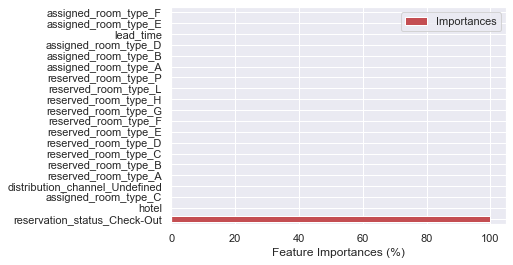

In [79]:
pd.DataFrame(data = cart_model.feature_importances_*100,
                   columns = ["Importances"],
                   index = X_train.columns).sort_values("Importances", ascending = False)[:20].plot(kind = "barh", color = "r")

plt.xlabel("Feature Importances (%)")

#There are 65 columns , we are taking the top 20 features and only reservation_status has a good impact on the model

#Like we predicted it would have a direct impact , we are not able to study the other features because it supercedes the other features. For the sake of analysis , we are going to drop the column to study the rest.

In [80]:
df2 = df1.drop(columns = ['reservation_status_Canceled', 'reservation_status_Check-Out', 'reservation_status_No-Show'], axis = 1)

In [81]:
y = df2["is_canceled"]
X = df2.drop(["is_canceled"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [82]:
cart = DecisionTreeClassifier(max_depth = 12)

In [83]:
cart_model = cart.fit(X_train, y_train)

In [84]:
y_pred = cart_model.predict(X_test)

In [85]:
print('Decision Tree Model')
print("\n")
print ("Accuracy score:", accuracy_score(y_test,y_pred))
print("\n")
print("Confusion matrix:",confusion_matrix(y_test,y_pred))

Decision Tree Model


Accuracy score: 0.8405943369778526


Confusion matrix: [[20262  2054]
 [ 3632  9722]]


#Logistic Regression Model

In [86]:
log_model_object=LogisticRegression()
log_model=log_model_object.fit(X_train,y_train)
y_pred=log_model.predict(X_test)

In [87]:
print('Logistic Regression')
print("\n")
print ("Accuracy score:", accuracy_score(y_test,y_pred))
print("\n")
print("Confusion matrix:",confusion_matrix(y_test,y_pred))

Logistic Regression


Accuracy score: 0.7845808802915616


Confusion matrix: [[19890  2426]
 [ 5258  8096]]


In [88]:
LogR = LogisticRegression(solver = "liblinear")
cv_scores = cross_val_score(LogR, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.7716446521163874


In [89]:
print('Model: Gaussian Naive Bayes\n')
nb_model_object=GaussianNB()
nb_model=nb_model_object.fit(X_train,y_train)
y_pred=nb_model.predict(X_test)


Model: Gaussian Naive Bayes



In [90]:
print('Gaussian Naive Bayes')
print("\n")
print ("Accuracy score:", accuracy_score(y_test,y_pred))
print("\n")
print("Confusion matrix:",confusion_matrix(y_test,y_pred))

Gaussian Naive Bayes


Accuracy score: 0.5875805999439305


Confusion matrix: [[ 9579 12737]
 [ 1974 11380]]


In [91]:
NB = GaussianNB()
cv_scores = cross_val_score(NB, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.5616060346409013


In [92]:
#Random forest
randomf = RandomForestClassifier()
rf_model1 = randomf.fit(X_train, y_train)
y_pred=rf_model1.predict(X_test)

In [93]:
print('Random Forest')
print("\n")
print ("Accuracy score:", accuracy_score(y_test,y_pred))
print("\n")
print("Confusion matrix:",confusion_matrix(y_test,y_pred))

Random Forest


Accuracy score: 0.8831230726100364


Confusion matrix: [[20836  1480]
 [ 2689 10665]]


Text(0.5, 0, 'Feature Importances (%)')

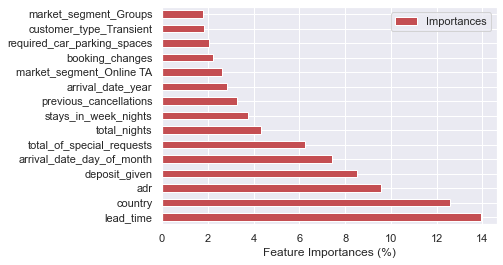

In [94]:
randomf = RandomForestClassifier()
rf_model1 = randomf.fit(X_train, y_train)

pd.DataFrame(data = rf_model1.feature_importances_*100,
                   columns = ["Importances"],
                   index = X_train.columns).sort_values("Importances", ascending = False)[:15].plot(kind = "barh", color = "r")

plt.xlabel("Feature Importances (%)")

In [95]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

model.fit(X_train, y_train)

predicted = model.predict(X_test)
report = classification_report(y_test, predicted)
print("Classification Report: ", "\n", "\n", report)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.81      0.86      0.83     22316
           1       0.73      0.66      0.69     13354

    accuracy                           0.78     35670
   macro avg       0.77      0.76      0.76     35670
weighted avg       0.78      0.78      0.78     35670



In [96]:
print('K Nearest Neighbours')
print("\n")
print ("Accuracy score:", accuracy_score(y_test,predicted))
print("\n")
print("Confusion matrix:",confusion_matrix(y_test,predicted))

K Nearest Neighbours


Accuracy score: 0.7805999439304738


Confusion matrix: [[19083  3233]
 [ 4593  8761]]
